In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functions

### First, dealing with the data

####  1.import the data(pandas)

In [106]:
cla_data = pd.read_csv("D:/NTHU COM/courses/DL/HW1_A141163/2025_ionosphere_data.csv")
cla_data[:5]

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.0376,...,-0.51171,0.41078,-0.46168,0.21266,-0.3409,0.42267,-0.54487,0.18641,-0.453,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


#### 2.shuffle data samples for training and for testing(pandas)

In [107]:
from functions import train_test_split
train, test = train_test_split(cla_data, test_size=0.2, random_state=42)

#### 3. store training sample/label and test sample/label properly(pythonlist and Numpy)

In [108]:
feature = feature_cols = cla_data.columns[:-1]
label = feature_cols = cla_data.columns[-1]

- turn data to numpy and label it

In [109]:
X_train = train[feature].to_numpy(dtype=float)
y_train = np.where(train[label] == 'g', 1, 0).reshape(-1, 1)
X_test = test[feature].to_numpy(dtype=float)
y_test = np.where(test[label] == 'g', 1, 0).reshape(-1, 1)

- Try to transform labels into one-hot encoding (g=10, b=01)

In [110]:
def to_onehot(y_int, num_classes=2):
    y_int = y_int.reshape(-1)
    N = y_int.shape[0]
    Y = np.zeros((N, num_classes))
    Y[np.arange(N), y_int] = 1
    return Y

y_train_oh = to_onehot(y_train, 2)
y_test_oh  = to_onehot(y_test,  2)

- check

In [111]:
print(X_train.shape)
print(X_test.shape)

(280, 34)
(70, 34)


### Second, build nn layers and nn architectures (more details in functions.py)

#### (a) Please try to classify the Ionosphere data by minimizing the cross-entropy error function. 
#### (c) Compare the results of choosing different numbers of nodes in the layer before the output layer by plotting the distribution of latent features at different training stage. 

- Data preparation

In [112]:
N, D = X_train.shape
H_hidden = 16  
H_out = 2              # g/b
lr = 0.2
epochs = 400

In [113]:
from functions import init_layer
W0, b0 = init_layer(D, H_hidden)
W1, b1 = init_layer(H_hidden, H_out)
train_losses, test_losses = [], []
train_errs,  test_errs  = [], []

- training and testing (with graphs)

In [ ]:
def plot_latent_2d(A1, y_int, title="2D feature"):

    A2 = A1[:, :2] 
    y_int = y_int.reshape(-1)

    plt.figure(figsize=(6,4))
    plt.scatter(A2[y_int==0, 0], A2[y_int==0, 1], s=30, label="Class 0", edgecolors='none')
    plt.scatter(A2[y_int==1, 0], A2[y_int==1, 1], s=30, label="Class 1", edgecolors='none')
    plt.title(title)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

epoch    1 | loss_tr 0.6999 | err_tr 0.646 | loss_te 0.6714 | err_te 0.386


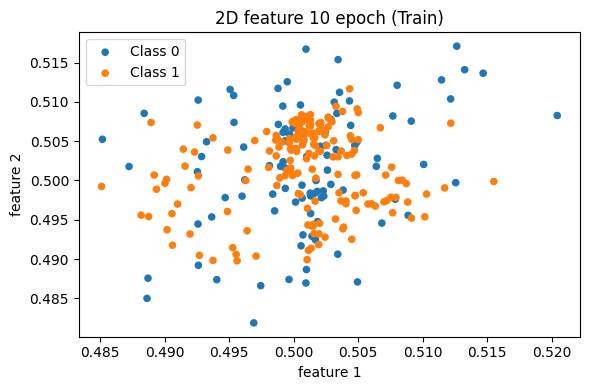

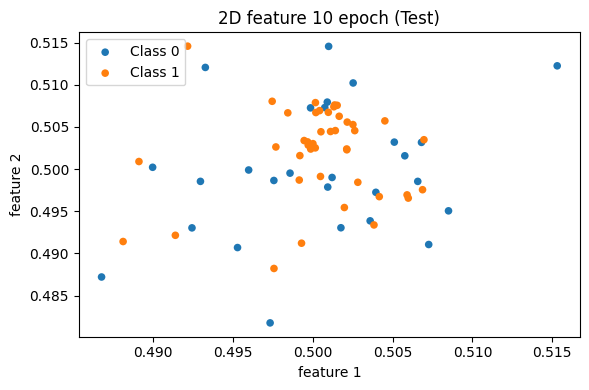

epoch   20 | loss_tr 0.6485 | err_tr 0.354 | loss_te 0.6675 | err_te 0.386
epoch   40 | loss_tr 0.6470 | err_tr 0.354 | loss_te 0.6656 | err_te 0.386
epoch   60 | loss_tr 0.6451 | err_tr 0.354 | loss_te 0.6631 | err_te 0.386
epoch   80 | loss_tr 0.6425 | err_tr 0.354 | loss_te 0.6596 | err_te 0.386
epoch  100 | loss_tr 0.6387 | err_tr 0.354 | loss_te 0.6543 | err_te 0.386
epoch  120 | loss_tr 0.6330 | err_tr 0.354 | loss_te 0.6463 | err_te 0.386
epoch  140 | loss_tr 0.6242 | err_tr 0.354 | loss_te 0.6342 | err_te 0.386
epoch  160 | loss_tr 0.6112 | err_tr 0.354 | loss_te 0.6164 | err_te 0.386
epoch  180 | loss_tr 0.5926 | err_tr 0.350 | loss_te 0.5918 | err_te 0.386
epoch  200 | loss_tr 0.5677 | err_tr 0.329 | loss_te 0.5604 | err_te 0.329
epoch  220 | loss_tr 0.5372 | err_tr 0.279 | loss_te 0.5242 | err_te 0.271
epoch  240 | loss_tr 0.5034 | err_tr 0.207 | loss_te 0.4869 | err_te 0.229
epoch  260 | loss_tr 0.4694 | err_tr 0.168 | loss_te 0.4523 | err_te 0.171
epoch  280 | loss_tr 0.43

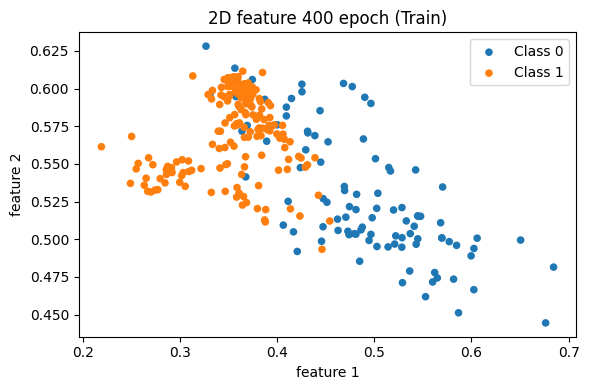

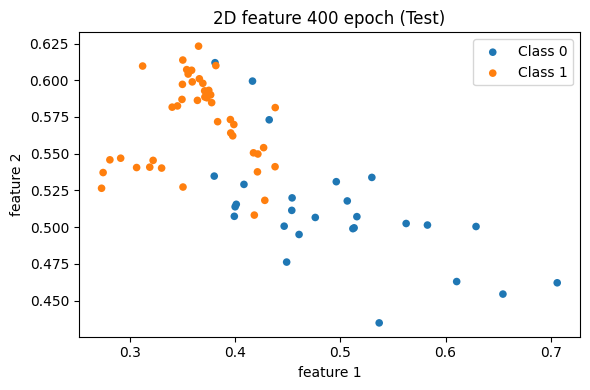

In [ ]:
from functions import forward_prop_cls, backward_prop_cls, sgd_update, error_rate, cross_entropy
for ep in range(1, epochs+1):
    # forward
    yhat_tr, cache = forward_prop_cls(X_train, W0, b0, W1, b1)
    # backward
    loss_tr, dW0, db0, dW1, db1, _ = backward_prop_cls(y_train_oh, cache, W0, W1)
    # SGD
    W1, b1 = sgd_update(W1, b1, dW1, db1, lr)
    W0, b0 = sgd_update(W0, b0, dW0, db0, lr)

    # training
    err_tr = error_rate(yhat_tr, y_train_oh)
    train_losses.append(loss_tr)
    train_errs.append(err_tr)

    # testing
    yhat_te, _ = forward_prop_cls(X_test, W0, b0, W1, b1)
    loss_te, _ = cross_entropy(yhat_te, y_test_oh)
    err_te = error_rate(yhat_te, y_test_oh)
    test_losses.append(loss_te)
    test_errs.append(err_te)

    if ep % 20 == 0 or ep == 1:
        print(f"epoch {ep:4d} | loss_tr {loss_tr:.4f} | err_tr {err_tr:.3f} | "
              f"loss_te {loss_te:.4f} | err_te {err_te:.3f}")
    if ep == 10 or ep == epochs:
        yhat_tr, cache = forward_prop_cls(X_train, W0, b0, W1, b1)
        Xc, Z0c, A1c, yhatc = cache 
        plot_latent_2d(A1c, y_train, title=f"2D feature {ep} epoch (Train)")
        
        yhat_te_cache = forward_prop_cls(X_test, W0, b0, W1, b1)[1]
        _, _, A1_te, _ = yhat_te_cache
        plot_latent_2d(A1_te, y_test, title=f"2D feature {ep} epoch (Test)")

- Print last value of training and testing

In [93]:
print("\n=== Final Results ===")
print(f"Train CE Loss : {train_losses[-1]:.4f}")
print(f"Train Error   : {train_errs[-1]:.4f}")
print(f"Test  CE Loss : {test_losses[-1]:.4f}")
print(f"Test  Error   : {test_errs[-1]:.4f}")


=== Final Results ===
Train CE Loss : 0.3187
Train Error   : 0.1071
Test  CE Loss : 0.3462
Test  Error   : 0.1286


- Plot Learning Curve and Error curve of both training and testing

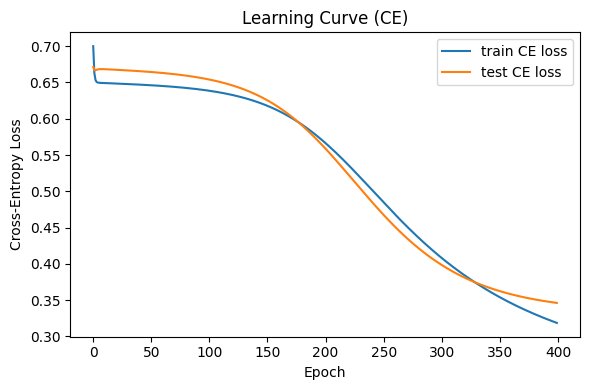

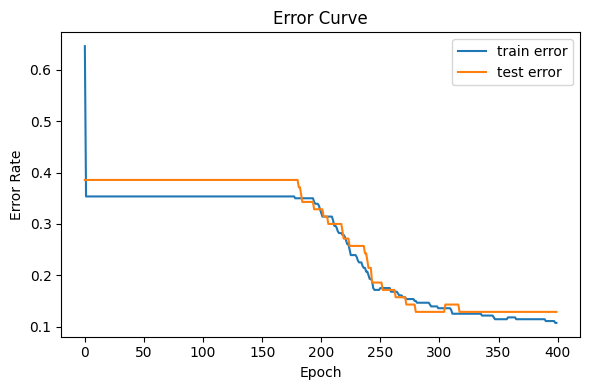

In [94]:
plt.figure(figsize=(6,4))
plt.plot(train_losses, label="train CE loss")
plt.plot(test_losses,  label="test CE loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Learning Curve (CE)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(train_errs, label="train error")
plt.plot(test_errs,  label="test error")
plt.xlabel("Epoch")
plt.ylabel("Error Rate")
plt.title("Error Curve")
plt.legend()
plt.tight_layout()
plt.show()